<a href="https://colab.research.google.com/github/WarriorRy/Image-Denoising/blob/master/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from skimage.metrics import peak_signal_noise_ratio


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_test.shape)
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)
(60000, 28, 28)


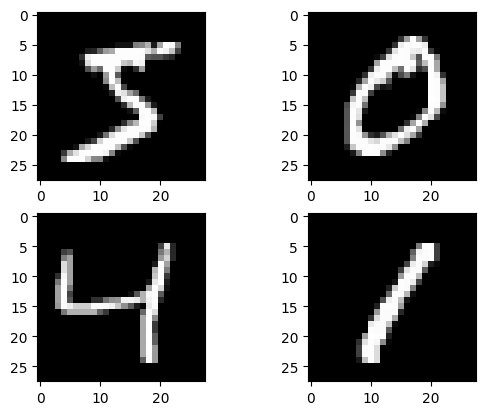

In [3]:
# Display a few training images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
# Flatten images
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalize pixel values
X_train = X_train / 255
X_test = X_test / 255

print(X_test.shape)
print(X_train.shape)


(10000, 784)
(60000, 784)


In [6]:
# Add noise to the images
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [7]:
# Build the autoencoder model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))


In [8]:
# Compile and train the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=60, batch_size=200)


Epoch 1/60
300/300 [==============================] - 13s 39ms/step - loss: 0.0416 - val_loss: 0.0197
Epoch 2/60
300/300 [==============================] - 12s 39ms/step - loss: 0.0165 - val_loss: 0.0137
Epoch 3/60
300/300 [==============================] - 12s 39ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 4/60
300/300 [==============================] - 11s 38ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 5/60
300/300 [==============================] - 11s 38ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 6/60
300/300 [==============================] - 10s 34ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 7/60
300/300 [==============================] - 11s 38ms/step - loss: 0.0084 - val_loss: 0.0082
Epoch 8/60
300/300 [==============================] - 12s 39ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 9/60
300/300 [==============================] - 13s 43ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 10/60
300/300 [==============================] - 11s 38ms/step - loss: 0.007

In [9]:
# Predict denoised images
pred = model.predict(x_test_noisy)

print(pred.shape)
print(X_test.shape)


313/313 [==============================] - 1s 4ms/step
(10000, 784)
(10000, 784)


In [10]:
psnr_scores = [peak_signal_noise_ratio(X_test[i], pred[i]) for i in range(len(X_test))]
import numpy as np
# Calculate the average PSNR score
average_psnr = np.mean(psnr_scores)

print(f"Average PSNR score: {average_psnr}")


Average PSNR score: 23.24213949788709
